This notebook compares the BART errored data and that errored by tab-err

All data comes from clean HOSP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Helper Functions/Setup

In [2]:
def create_error_bar_chart(error_mask: pd.DataFrame):
    """
    Creates a bar chart visualizing the number of errors per column.

    Args:
        df (pd.DataFrame): The input DataFrame.
    """

    # Sum the errors for each column
    column_error_counts = error_mask.sum()

    # Get the column names for the x-axis
    columns = column_error_counts.index

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(columns, column_error_counts, color='skyblue')
    plt.xlabel('Column Number')
    plt.ylabel('Number of Errors')
    plt.title('Number of Errors Per Column')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


def create_grouped_error_bar_chart(
    error_masks: list[pd.DataFrame],
    labels: list[str],
    output_file: str = None
):
    """
    Creates a grouped bar chart visualizing the number of errors per column 
    for an arbitrary number of error masks.

    Args:
        error_masks (list[pd.DataFrame]): List of boolean error mask DataFrames.
        labels (list[str]): Labels for each error mask (must match length of error_masks).
        output_file (str): Optional. If provided, saves the chart to this file (supports PDF, PNG, etc.).
    """
    if len(error_masks) != len(labels):
        raise ValueError("Number of labels must match number of error masks.")

    # Collect all columns across DataFrames
    all_columns = error_masks[0].columns
    for df in error_masks[1:]:
        all_columns = all_columns.union(df.columns)

    # Sum errors for each DataFrame, aligning on all columns
    counts = []
    for df in error_masks:
        counts.append(df.sum().reindex(all_columns, fill_value=0))

    # X locations
    x = np.arange(len(all_columns))
    n = len(error_masks)
    width = 0.8 / n  # total bar width capped at 80% of space

    # Plot
    plt.figure(figsize=(max(10, len(all_columns) * 0.6), 6))
    for i, (label, count) in enumerate(zip(labels, counts)):
        plt.bar(x + (i - n/2) * width + width/2, count, width, label=label)

    plt.xlabel("Column Name")
    plt.ylabel("Number of Errors")
    plt.title("Comparison of Errors Per Column")
    plt.xticks(x, all_columns, rotation=90, ha="center")
    plt.legend()
    #plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()

    if output_file:
        plt.savefig(output_file)
        print(f"Saved chart to {output_file}")
    else:
        plt.show()


Load Data

In [3]:
bart_mask_df = pd.read_csv("../output/BART_mask.csv", index_col=False)

ecar_mask_df = pd.read_csv("../output/ecar_typo_mask.csv", index_col=False).astype(int).drop(columns=["Unnamed: 0"])

mid_level_mask = pd.read_csv("../output/mid_level_HOSP_mask.csv", index_col=False).astype(int).drop(columns=["Unnamed: 0"])

In [4]:
# BART 1 error mask
print(f"Error Prop BART: {bart_mask_df.stack().sum()/ (bart_mask_df.shape[0]*bart_mask_df.shape[1])}")
print(f"Error Prop Mid Level: {mid_level_mask.stack().sum()/ (mid_level_mask.shape[0]*mid_level_mask.shape[1])}")  # Num errors / Num cells

Error Prop BART: 0.18085
Error Prop Mid Level: 0.18085


Number of errors per column

In [5]:
print("No. Errors per Column")

print("\nHigh Level API:")
print(ecar_mask_df.sum())

print("\n\nMid Level API")
print(mid_level_mask.sum())

print("\n\nBART")
print(bart_mask_df.sum(axis=0))

No. Errors per Column

High Level API:
index                 0
ProviderNumber      190
HospitalName        190
Address1            190
Address2            190
Address3            190
City                190
State               190
ZipCode             190
CountyName          190
PhoneNumber         190
HospitalType        190
HospitalOwner       190
EmergencyService    190
Condition           190
MeasureCode         190
MeasureName         190
Score               190
Sample              190
StateAverage        190
dtype: int64


Mid Level API
index                 0
ProviderNumber        0
HospitalName        188
Address1            275
Address2              0
Address3              0
City                311
State               759
ZipCode             103
CountyName          529
PhoneNumber         201
HospitalType          0
HospitalOwner       112
EmergencyService    640
Condition           300
MeasureCode          30
MeasureName         100
Score                 0
Sample              

# Analyze!

Error Distribution

Saved chart to 09-17-2025-BART-tab-err-comparison.pdf


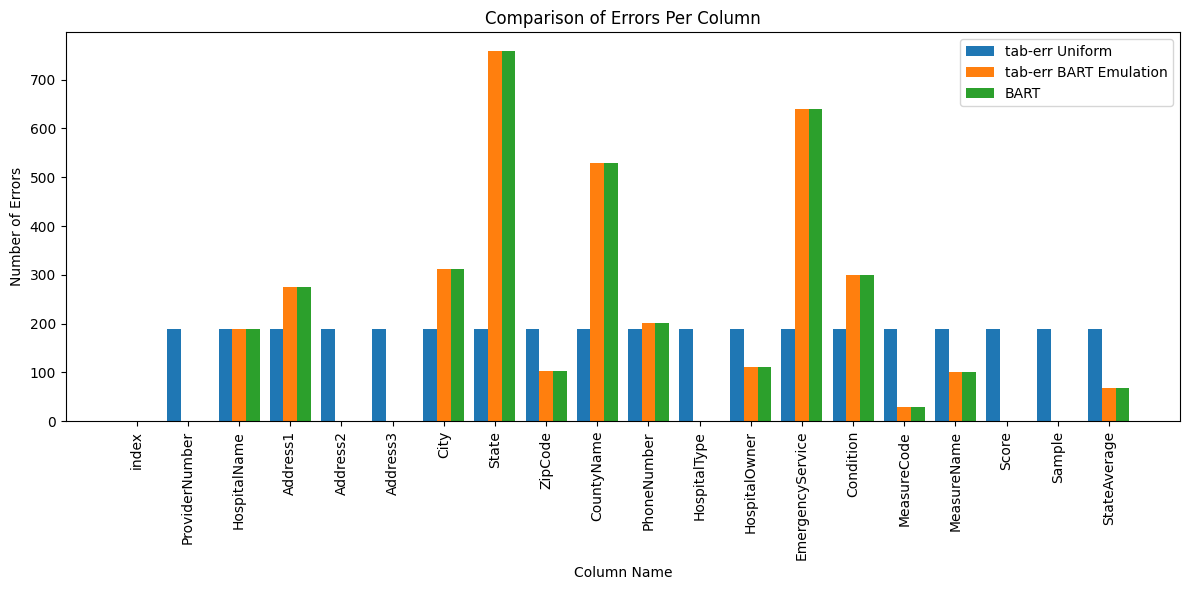

In [6]:
create_grouped_error_bar_chart([ecar_mask_df, mid_level_mask, bart_mask_df], ["tab-err Uniform", "tab-err BART Emulation", "BART"], "09-17-2025-BART-tab-err-comparison.pdf")